# Import Packages for the script

In [1]:
import json
import requests
import os
import urllib.request
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


# Extract JSON response over  HTTP

In [2]:
url="http://ptrckprry.com/course/ssd/data/federalist.json"
with urllib.request.urlopen(url) as response:
    k = response.read()

# Convert all text to lower case making it case insensitive for the script

In [3]:
k=str(k)
a=k.lower()

# Replace symbols in json for characters like backslash,single quotes

In [4]:
k=k.replace("\\\\n"," ").replace("\\\'","'").replace("b\'","")

In [5]:
#a=a.replace("\\\\n"," ").replace("\\\'","'").replace("b\'","")

In [6]:
l=[]
dictlist=[]

z=k.split("\\n")

del z[-1]

# Convert JSON response to clean dictionary

In [7]:
for i in range(0,len(z)):
    try:
        dictlist.append(json.loads(z[i]))
    except:
        try:
            d=z[i]
            #d=d.replace('\\\\*','"').replace('*','"')
            ftext=d[d.find('"text": "')+9:d.find('", "date":')]#.replace('"','*')
            fauthor=d[d.find('"author": ')+11:d.find('", "text":')]
            fdate=d[d.find('"date": ')+8:d.find('", "title": ')]
            ftitle=d[d.find('"title": ')+10:d.find('", "paper_id": ')]
            fpaperid=d[d.find('"paper_id": ')+12:d.find(', "venue": ')]
            fvenue=d[d.find('"venue": ')+10:d.find('"}')]
            emptydict={}
            emptydict['author']=fauthor
            emptydict['text']=ftext
            emptydict['date']=fdate
            emptydict['title']=ftitle
            emptydict['paper_id']=fpaperid
            emptydict['venue']=fvenue
            #emptydict=str(emptydict)
            dictlist.append(emptydict)
            #l.append(i)
        except:
            l.append(i)

# Add all json response in pandas dataframe and create a total wordcount for each essay

In [8]:
#dictlist[1]
from collections import Counter

df=pd.DataFrame(columns=['paper_id','text','date','title','author','venue','wordcount'])

df['total_words']=0

#df['text']=df['text'].replace('\\\\"','"')

for i in range(0,len(dictlist)):
    text=dictlist[i]['text'].lower().replace("'"," ").replace("!"," ").replace("?"," ").replace(","," ").replace(":"," ").replace(";"," ").replace("   "," ").replace("  "," ").replace('\\\\"','"')
    words =text.split()
    wordcount = Counter(words)
    df = df.append({"paper_id":dictlist[i]['paper_id'],
    "text": text,
    "date":dictlist[i]['date'],"title":dictlist[i]['title'],"author":dictlist[i]['author'],"venue":dictlist[i]['venue'],"wordcount":wordcount}, ignore_index=True)

for i in range(0,len(df)):
    #df['text'].iloc[i]=df['text'].iloc[i].replace('\\\\"','"')
    #df['text'].iloc[i]=df['text'].iloc[i].replace("'"," ").replace("!"," ").replace("?"," ").replace(","," ").replace(":"," ").replace(";"," ").replace("   "," ").replace("  "," ")
    #df['text'].iloc[i]=df['text'].iloc[i].lower()
    df['total_words'].iloc[i]=len(df['text'].iloc[i].split(" "))
    try:
        if df['date'].iloc[i].find("null") != -1:
            df['date'].iloc[i]="null"
        else:
            continue
    except:
        df['date'].iloc[i]="null"

# Create Bar graphs and histograms of custom size

In [9]:
import matplotlib.pyplot as plt; #plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 28
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print("Current size:", fig_size)
 


Current size: [28, 9]


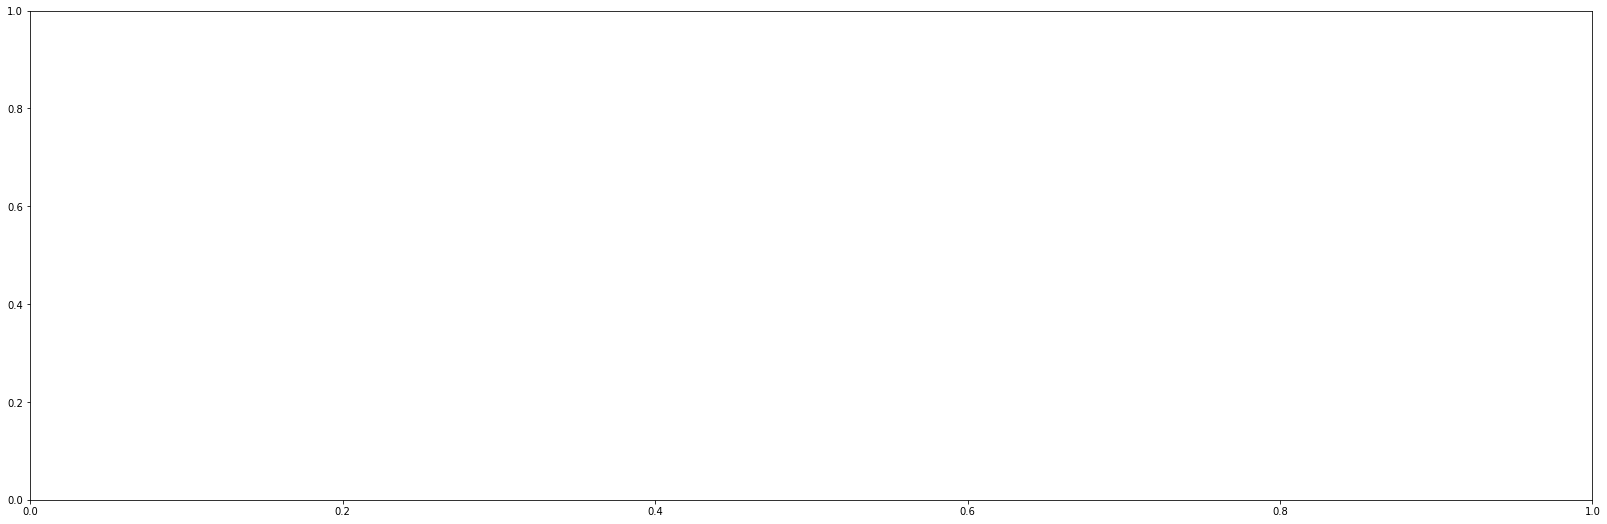

In [10]:
fig, ax = plt.subplots()

In [11]:
index = np.arange(len(df.total_words.tolist()))
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index, df.total_words.tolist(), bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config)

NameError: name 'ax1' is not defined

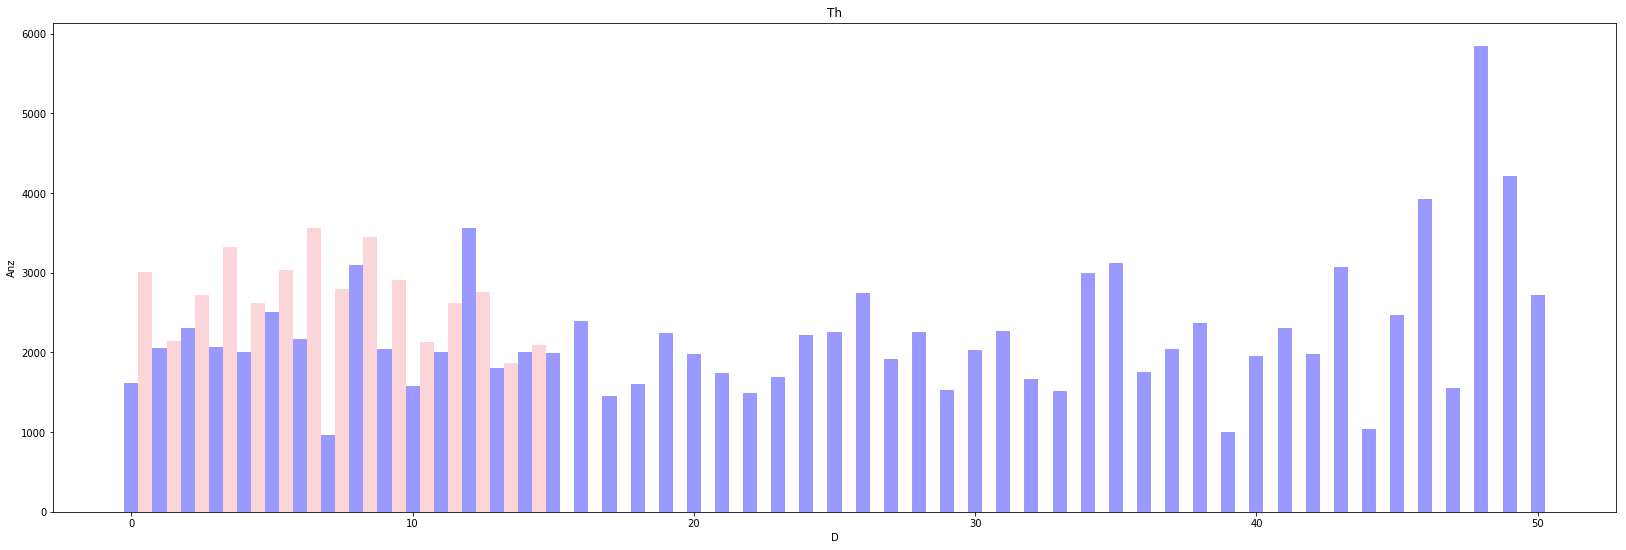

In [12]:
fig, ax = plt.subplots()
n1= len(df[df['author'] == 'HAMILTON'])
n2=len(df[df['author'] == 'MADISON'])

#m1 = (0.10,0.12,0.10,0.11,0.14,0.10)
#m2=(0.21,0.21,0.20,0.22,0.20,0.21)
#m3=(0.29,0.27,0.28,0.24,0.23,0.23)
#m4=(0.41,0.39,0.35,0.37,0.41,0.40)
m1=tuple(df[df['author'] == 'HAMILTON'].total_words.tolist())
m2=tuple(df[df['author'] == 'MADISON'].total_words.tolist())
x1=range(len(df[df['author'] == 'HAMILTON']))
x2=range(len(df[df['author'] == 'MADISON']))

index1 = np.arange(n1)
index2 = np.arange(n2)

bar_width = 0.5

opacity = 0.4
error_config = {'ecolor': '0.3'}
r1 = ax.bar(index1, m1, bar_width,
                 alpha=opacity,
                 color='b',

                 error_kw=error_config)

r2 = ax.bar(index2 + bar_width, m2, bar_width,
                 alpha=opacity,
                 color='#F9979F',

                 error_kw=error_config)
                
plt.xlabel('D')
plt.ylabel('Anz')
plt.title('Th')

#f, ((ax1, ax2)) = plt.subplots(1, 1, sharex='col', sharey='row')

ax1.plot(x1,m1)
ax2.plot(x2,m2)

plt.tight_layout()
plt.show()

In [13]:
tuple(df[df['author'] == 'HAMILTON'].total_words.tolist())

(1618.0,
 2054.0,
 2310.0,
 2062.0,
 1999.0,
 2506.0,
 2166.0,
 968.0,
 3091.0,
 2043.0,
 1575.0,
 2003.0,
 3562.0,
 1806.0,
 2010.0,
 1993.0,
 2391.0,
 1459.0,
 1608.0,
 2241.0,
 1974.0,
 1739.0,
 1493.0,
 1695.0,
 2220.0,
 2259.0,
 2744.0,
 1921.0,
 2258.0,
 1526.0,
 2025.0,
 2271.0,
 1661.0,
 1513.0,
 2996.0,
 3119.0,
 1752.0,
 2046.0,
 2373.0,
 1006.0,
 1949.0,
 2307.0,
 1980.0,
 3072.0,
 1044.0,
 2463.0,
 3929.0,
 1554.0,
 5846.0,
 4209.0,
 2723.0)

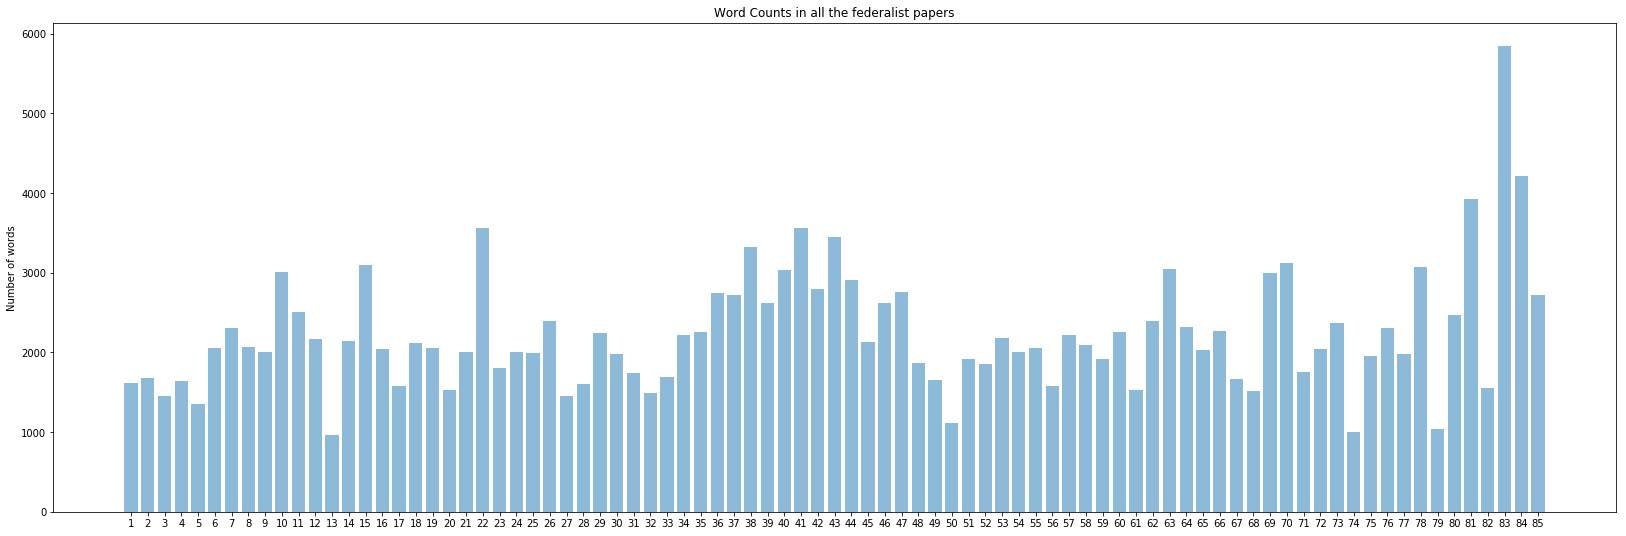

In [14]:
objects = tuple(df.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = df.total_words.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of words')
plt.title('Word Counts in all the federalist papers')
 
plt.show()

In [15]:
dfhamilton=df[df['author'] == 'HAMILTON']
dfmadison=df[df['author'] == 'MADISON']
dfjay=df[df['author'] == 'JAY']

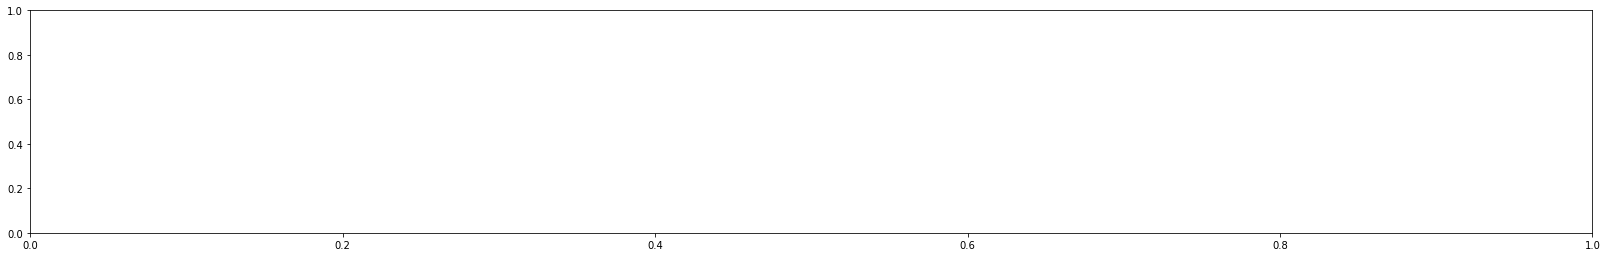

In [16]:
plt.figure()
plt.subplot(2,1,1)

Text(0.5,1,'HAMILTON')

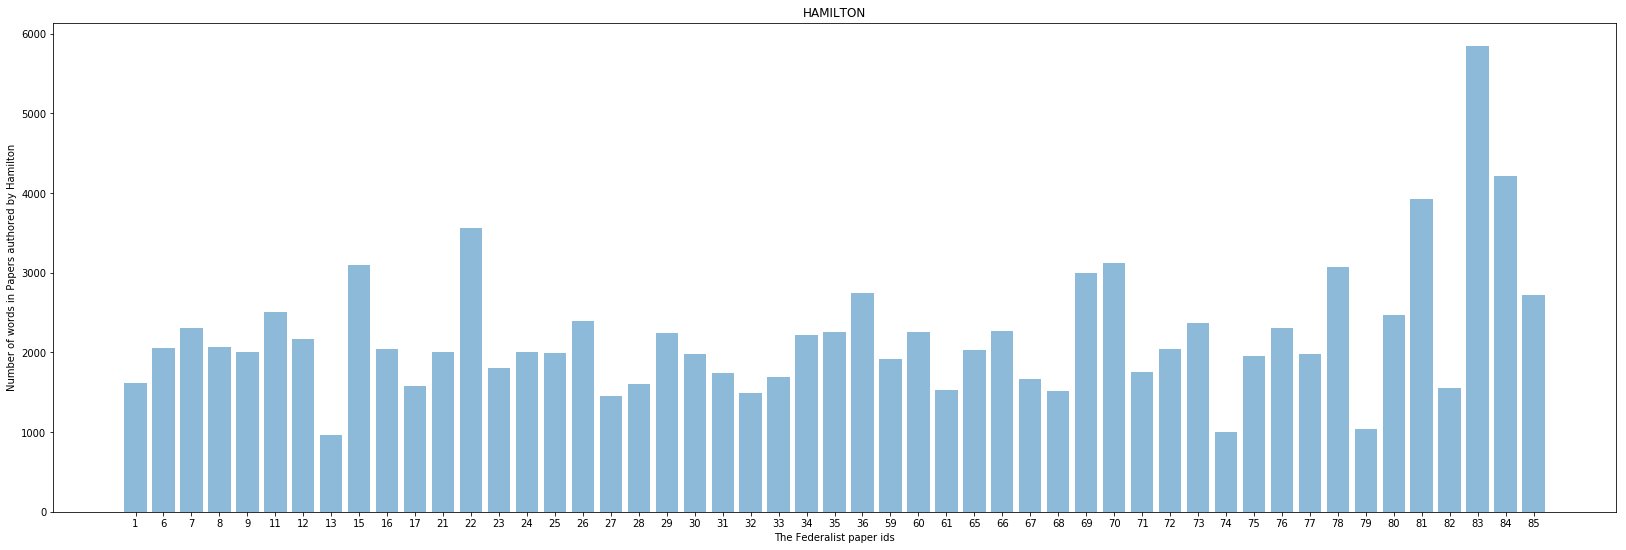

In [22]:
objects = tuple(dfhamilton.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfhamilton.total_words.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of words in Papers authored by Hamilton')
plt.xlabel('The Federalist paper ids')

plt.title('HAMILTON')
 
#plt.show()

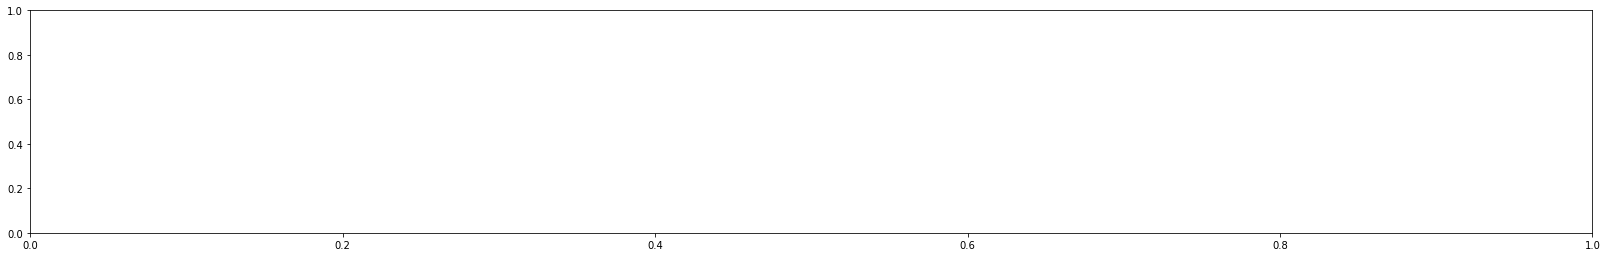

In [23]:
plt.subplot(2,1,2)

Text(0.5,1,'MADISON')

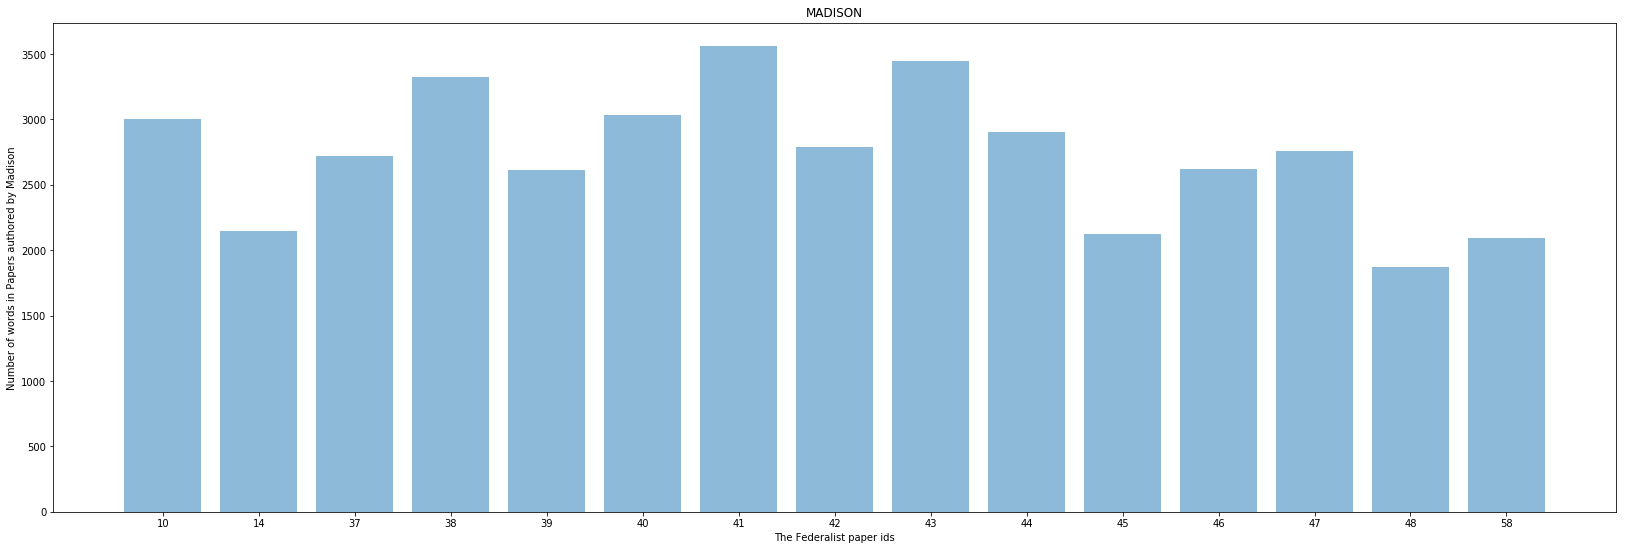

In [24]:
objects = tuple(dfmadison.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfmadison.total_words.tolist()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.ylabel('Number of words in Papers authored by Madison')
plt.xlabel('The Federalist paper ids')

plt.title('MADISON')
 

 
#plt.show()

Text(0.5,1,'JAY')

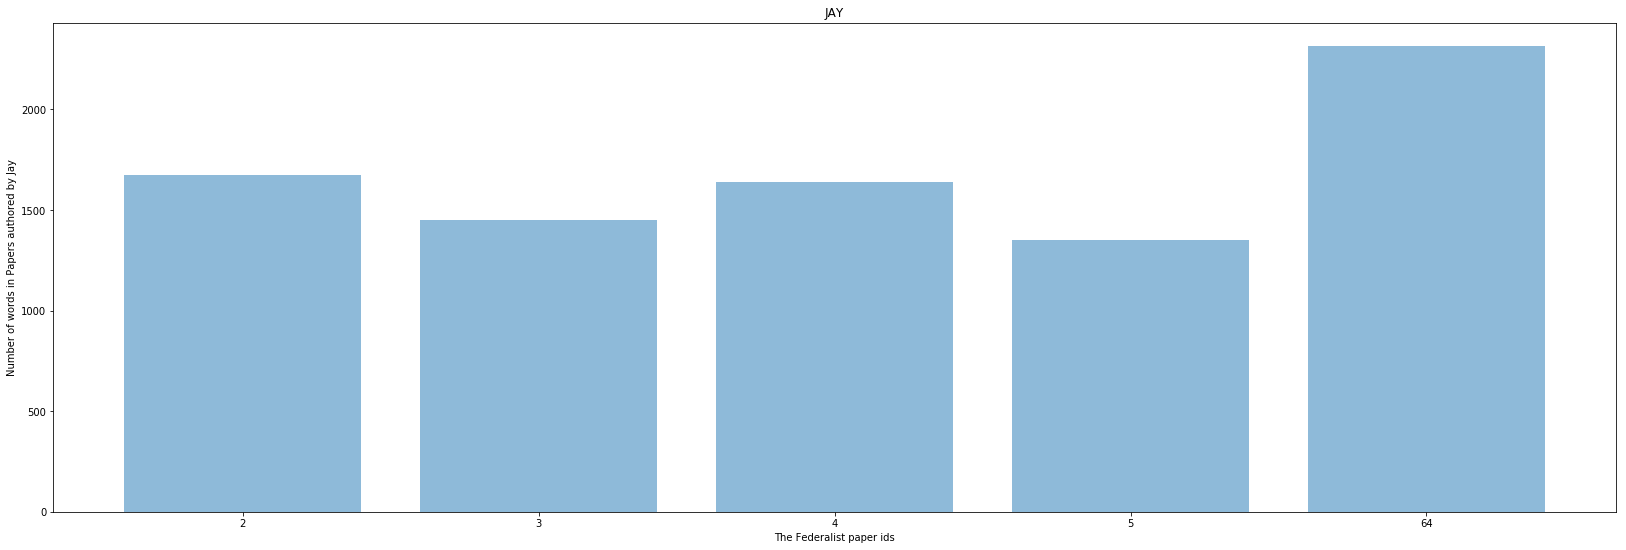

In [25]:
objects = tuple(dfjay.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfjay.total_words.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of words in Papers authored by Jay')
plt.xlabel('The Federalist paper ids')
plt.title('JAY')
 
#plt.show()

In [26]:
dfmadison['number_of_sentences']=0
dfhamilton['number_of_sentences']=0
dfjay['number_of_sentences']=0
dfmadison['Words_per_sentence_avg']=0
dfhamilton['Words_per_sentence_avg']=0
dfjay['Words_per_sentence_avg']=0

for i in range(0,len(dfmadison)):
    dfmadison['number_of_sentences'].iloc[i]=len(dfmadison['text'].iloc[i].split("."))
    dfmadison['Words_per_sentence_avg'].iloc[i]=dfmadison['total_words'].iloc[i]/dfmadison['number_of_sentences'].iloc[i]
    
for i in range(0,len(dfhamilton)):
    dfhamilton['number_of_sentences'].iloc[i]=len(dfhamilton['text'].iloc[i].split("."))
    dfhamilton['Words_per_sentence_avg'].iloc[i]=dfhamilton['total_words'].iloc[i]/dfhamilton['number_of_sentences'].iloc[i]
for i in range(0,len(dfjay)):
    dfjay['number_of_sentences'].iloc[i]=len(dfjay['text'].iloc[i].split("."))
    dfjay['Words_per_sentence_avg'].iloc[i]=dfjay['total_words'].iloc[i]/dfjay['number_of_sentences'].iloc[i]

In [27]:
#dfhamilton

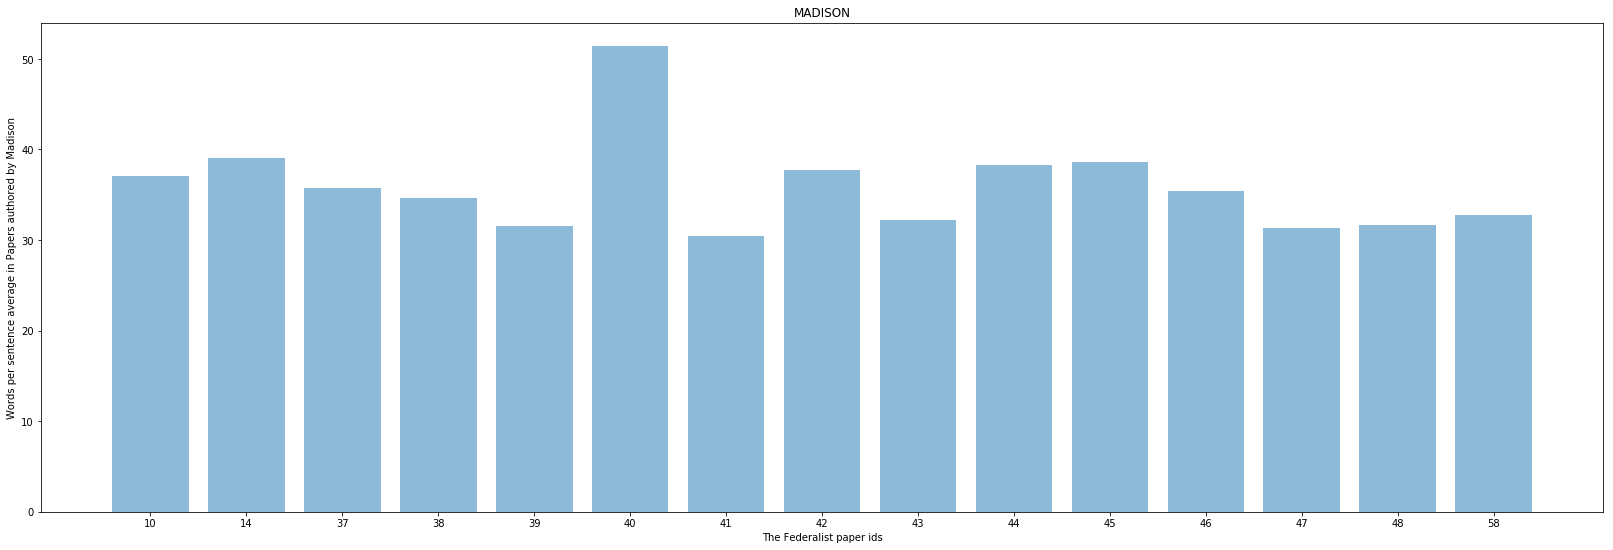

In [28]:
objects = tuple(dfmadison.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfmadison.Words_per_sentence_avg.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Words per sentence average in Papers authored by Madison')
plt.xlabel('The Federalist paper ids')

plt.title('MADISON')
 
plt.show()

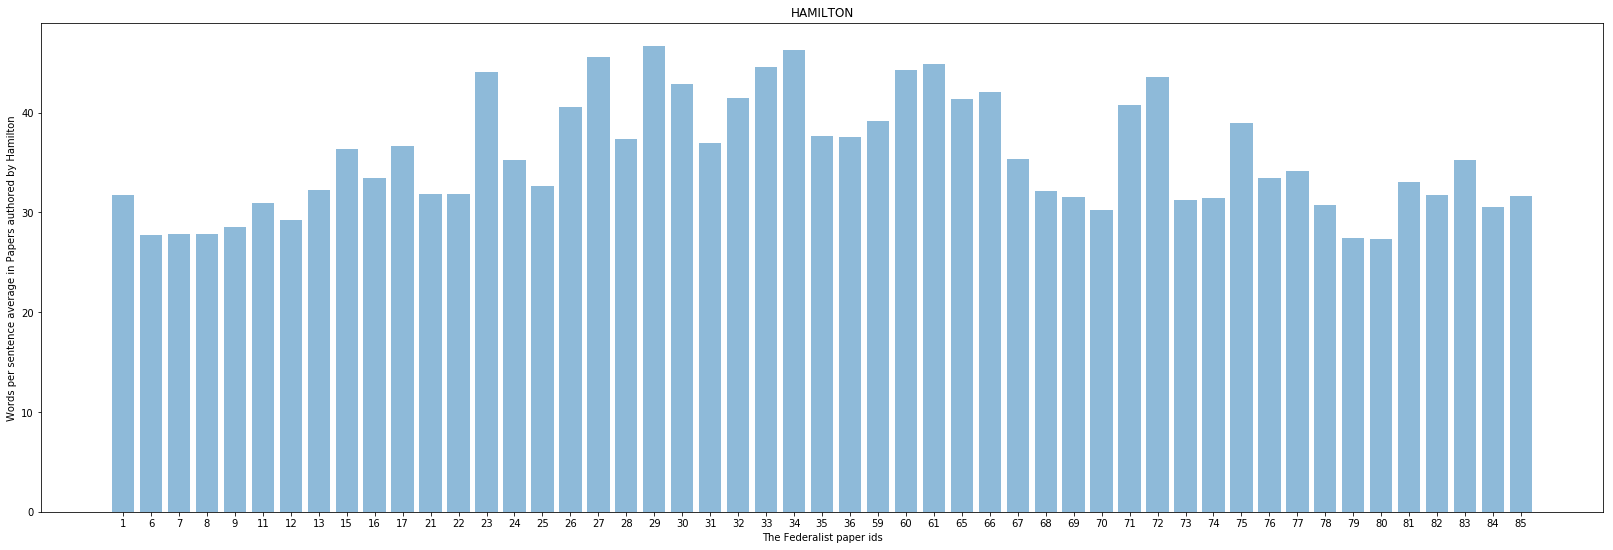

In [29]:
objects = tuple(dfhamilton.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfhamilton.Words_per_sentence_avg.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Words per sentence average in Papers authored by Hamilton')
plt.xlabel('The Federalist paper ids')

plt.title('HAMILTON')
 
plt.show()

In [30]:
#dfjay.sort_values(['Words_per_sentence_avg'],ascending=1,inplace=True)

In [31]:
#dfmadison.sort_values(['Words_per_sentence_avg'],ascending=1,inplace=True)
#dfhamilton.sort_values(['Words_per_sentence_avg'],ascending=1,inplace=True)

Text(0.5,1,'Frequency distribution of total words in papers')

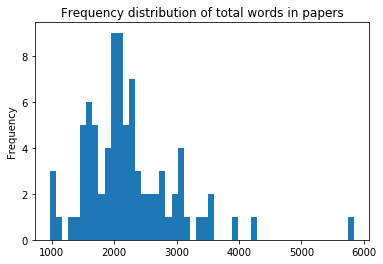

In [32]:
%matplotlib inline
x = df.total_words.tolist()
plt.hist(x, normed=False, bins=50)
plt.ylabel('Frequency');
plt.title("Frequency distribution of total words in papers")

Text(0.5,1,'Frequency distribution of words per sentences in papers authored by Hamilton')

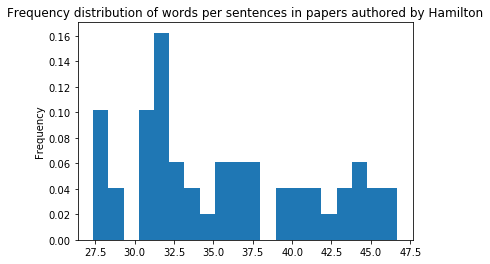

In [33]:
x = dfhamilton.Words_per_sentence_avg.tolist()
plt.hist(x, normed=True, bins=20)
plt.ylabel('Frequency');
plt.title("Frequency distribution of words per sentences in papers authored by Hamilton")

Text(0.5,1,'Frequency distribution of words per sentences in papers authored by Madison')

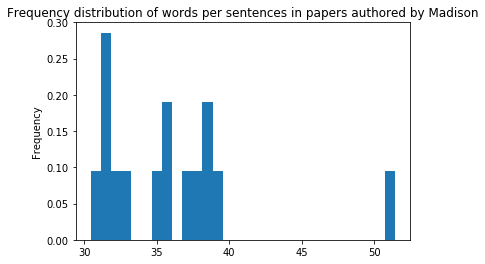

In [34]:
x = dfmadison.Words_per_sentence_avg.tolist()
plt.hist(x, normed=True, bins=30)
plt.ylabel('Frequency');
plt.title("Frequency distribution of words per sentences in papers authored by Madison")

In [35]:
#dfhamilton

In [36]:
#dfhamilton.boxplot()
#dfhamilton.boxplot(column='total_words')

In [37]:
#dfmadison[['total_words']].boxplot()
#dfmadison.boxplot(column='total_words')

In [38]:
#dfhamilton.boxplot(column='number_of_sentences')

In [39]:
#dfhamilton.boxplot(column='Words_per_sentence_avg')

In [40]:
dfcombine=pd.concat([dfhamilton,dfmadison])

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

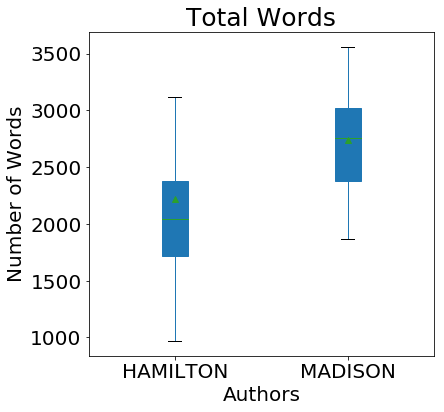

In [41]:
ax1=dfcombine.boxplot(column='total_words',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showfliers=False, showmeans=True)

ax1.set_title('Total Words',fontsize=25)

ax1.set_xlabel('Authors',fontsize=20)

ax1.set_ylabel('Number of Words',fontsize=20)

ax1.patch.set_facecolor('#FFFFFF')

ax1.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

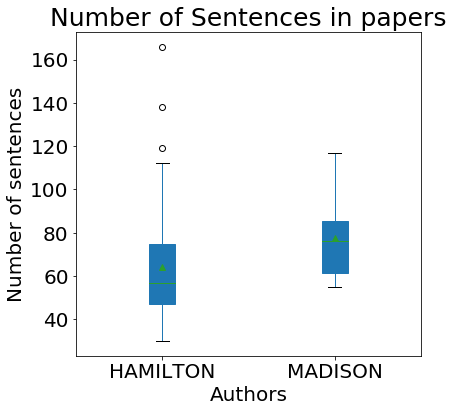

In [42]:
ax2=dfcombine.boxplot(column='number_of_sentences',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax2.set_title('Number of Sentences in papers',fontsize=25)

ax2.set_xlabel('Authors',fontsize=20)

ax2.set_ylabel('Number of sentences',fontsize=20)

ax2.patch.set_facecolor('#FFFFFF')

ax2.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

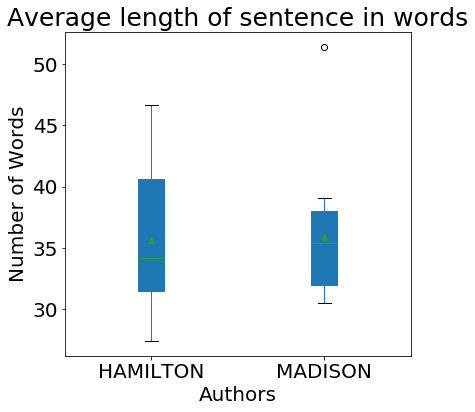

In [43]:
ax3=dfcombine.boxplot(column='Words_per_sentence_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax3.set_title('Average length of sentence in words',fontsize=25)

ax3.set_xlabel('Authors',fontsize=20)

ax3.set_ylabel('Number of Words',fontsize=20)

ax3.patch.set_facecolor('#FFFFFF')

ax3.figure.suptitle("")

In [44]:
#dfcombine.boxplot(column='total_words',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showfliers=False, showmeans=True)

In [45]:
#newplot=dict(newplot)



#newplot['total_words']['boxes'][0].set_color('red')

#newplot['total_words']['boxes'][1].set_color('red')



#fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharey=True)

#fig

In [46]:
#bplot1=ax[0][0].boxplot(dfmadison['total_words'],patch_artist=True)
#bplot2=ax[0][0].boxplot(dfmadison['Words_per_sentence_avg'],patch_artist=True)
#bplot3=ax[0][1].boxplot(dfmadison['number_of_sentences'],patch_artist=True)

#bplot4=ax[1][0].boxplot(dfhamilton['total_words'],patch_artist=True)
#bplot5=ax[1][0].boxplot(dfhamilton['Words_per_sentence_avg'],patch_artist=True)
#bplot6=ax[1][1].boxplot(dfhamilton['number_of_sentences'],patch_artist=True)

In [47]:
"""colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2,bplot3,bplot4,bplot5,bplot6):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)"""

"colors = ['pink', 'lightblue', 'lightgreen']\nfor bplot in (bplot1,bplot2,bplot3,bplot4,bplot5,bplot6):\n    for patch, color in zip(bplot['boxes'], colors):\n        patch.set_facecolor(color)"

In [48]:
dfcombine['by_count']=0
dfcombine['from_count']=0
dfcombine['to_count']=0
dfcombine['at_count']=0

for i in range(0,len(dfcombine)):
    dfcombine['by_count'].iloc[i]=dfcombine['text'].iloc[i].count('by')
    dfcombine['at_count'].iloc[i]=dfcombine['text'].iloc[i].count('at')
    dfcombine['from_count'].iloc[i]=dfcombine['text'].iloc[i].count('from')
    dfcombine['to_count'].iloc[i]=dfcombine['text'].iloc[i].count('to')

dfcombine['by_avg']=0
dfcombine['from_avg']=0
dfcombine['to_avg']=0
dfcombine['at_avg']=0


for i in range(0,len(dfcombine)):
    dfcombine['by_avg'].iloc[i]=(dfcombine['by_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['at_avg'].iloc[i]=(dfcombine['at_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['from_avg'].iloc[i]=(dfcombine['from_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['to_avg'].iloc[i]=(dfcombine['to_count'].iloc[i]/dfcombine['total_words'].iloc[i])*100

In [49]:
#temp=dfcombine.boxplot(column=['to_count','at_count'])

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

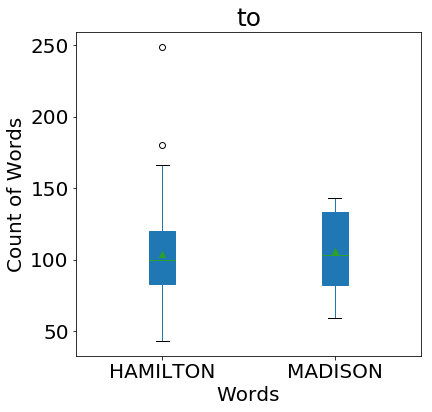

In [50]:
ax4=dfcombine.boxplot(column='to_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax4.set_title('to',fontsize=25)
ax4.set_xlabel('Words',fontsize=20)

ax4.set_ylabel('Count of Words',fontsize=20)

ax4.patch.set_facecolor('#FFFFFF')

ax4.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

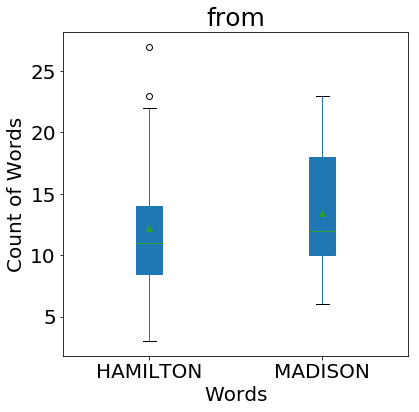

In [51]:
ax5=dfcombine.boxplot(column='from_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax5.set_title('from',fontsize=25)

ax5.set_xlabel('Words',fontsize=20)

ax5.set_ylabel('Count of Words',fontsize=20)

ax5.patch.set_facecolor('#FFFFFF')

ax5.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

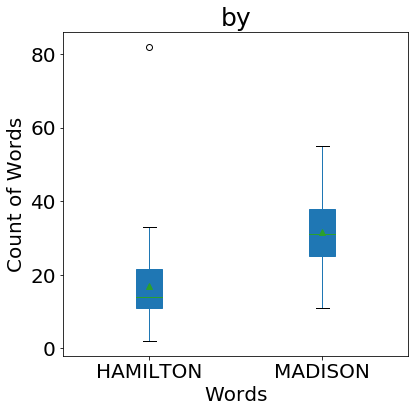

In [52]:
ax6=dfcombine.boxplot(column='by_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax6.set_title('by',fontsize=25)

ax6.set_xlabel('Words',fontsize=20)

ax6.set_ylabel('Count of Words',fontsize=20)

ax6.patch.set_facecolor('#FFFFFF')

ax6.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

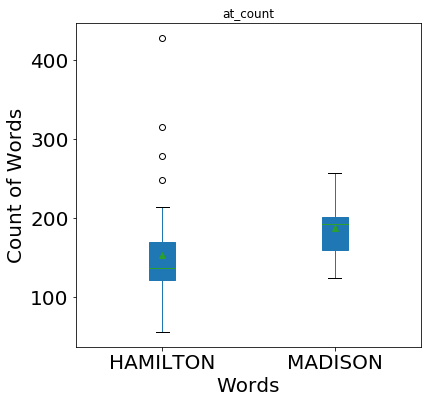

In [53]:
ax7=dfcombine.boxplot(column='at_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax6.set_title('at',fontsize=25)

ax7.set_xlabel('Words',fontsize=20)

ax7.set_ylabel('Count of Words',fontsize=20)

ax7.patch.set_facecolor('#FFFFFF')

ax7.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

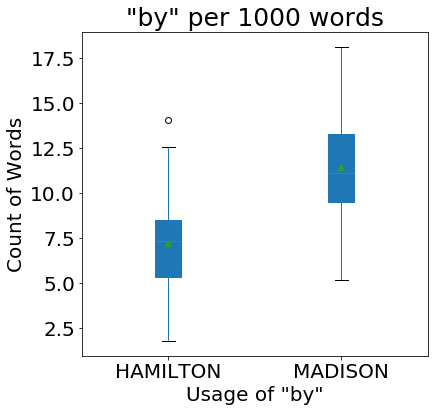

In [54]:
ax8=dfcombine.boxplot(column='by_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax8.set_title('"by" per 1000 words',fontsize=25)

ax8.set_xlabel('Usage of "by"',fontsize=20)

ax8.set_ylabel('Count of Words',fontsize=20)

ax8.patch.set_facecolor('#FFFFFF')

ax8.figure.suptitle("")
#ax8.figure

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

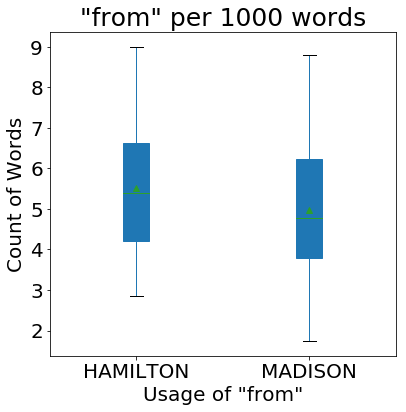

In [55]:
ax9=dfcombine.boxplot(column='from_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax9.set_title('"from" per 1000 words',fontsize=25)

ax9.set_xlabel('Usage of "from"',fontsize=20)

ax9.set_ylabel('Count of Words',fontsize=20)

ax9.patch.set_facecolor('#FFFFFF')

ax9.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

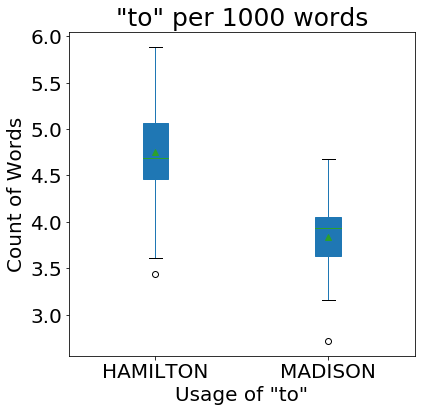

In [56]:
ax10=dfcombine.boxplot(column='to_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax10.set_title('"to" per 1000 words',fontsize=25)

ax10.set_xlabel('Usage of "to"',fontsize=20)

ax10.set_ylabel('Count of Words',fontsize=20)

ax10.patch.set_facecolor('#FFFFFF')

ax10.figure.suptitle("")

C:\Users\gandh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

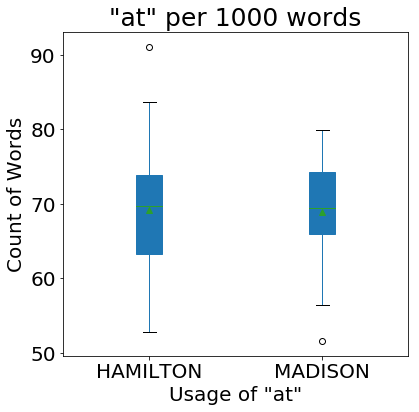

In [57]:
ax11=dfcombine.boxplot(column='at_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax11.set_title('"at" per 1000 words',fontsize=25)

ax11.set_xlabel('Usage of "at"',fontsize=20)

ax11.set_ylabel('Count of Words',fontsize=20)

ax11.patch.set_facecolor('#FFFFFF')

ax11.figure.suptitle("")

In [58]:
dfcombine=dfcombine.drop('wordcount',axis=1)

In [59]:
#dfcombine

In [60]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
le = preprocessing.LabelEncoder()
le.fit(list(dfcombine['author'].unique()))
list(le.classes_)
dfcombine['author']=le.transform(dfcombine.author.tolist())

In [62]:
#dfcombine

In [63]:
dffinal=df.drop(['date','title','venue','wordcount'],axis=1)

In [64]:
train=dfcombine.iloc[:,6:16]
test=dfcombine.iloc[:,4]

In [65]:
#TRAIN AND TEST SPLIT FOR X & y RESPECTIVELY
train_x, test_x, train_y, test_y = train_test_split(train,test,train_size=0.8)

In [66]:
#EXECUTING SIMPLE LINEAR LOGISTIC REGRESSION
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)))

Logistic regression Train Accuracy ::  1.0


In [68]:
confusion_matrix(test_y,lr.predict(test_x),labels=[0,1])

array([[9, 1],
       [1, 3]], dtype=int64)

In [69]:
td=df[df['author']=='HAMILTON OR MADISON']

In [70]:
td['number_of_sentences']=0
td['Words_per_sentence_avg']=0
td['by_count']=0
td['from_count']=0
td['to_count']=0
td['at_count']=0
td['by_avg']=0
td['from_avg']=0
td['to_avg']=0
td['at_avg']=0

for i in range(0,len(td)):
    td['number_of_sentences'].iloc[i]=len(td['text'].iloc[i].split("."))
    td['Words_per_sentence_avg'].iloc[i]=td['total_words'].iloc[i]/td['number_of_sentences'].iloc[i]
    td['by_count'].iloc[i]=td['text'].iloc[i].count('by')
    td['at_count'].iloc[i]=td['text'].iloc[i].count('at')
    td['from_count'].iloc[i]=td['text'].iloc[i].count('from')
    td['to_count'].iloc[i]=td['text'].iloc[i].count('to')
    td['by_avg'].iloc[i]=(td['by_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['at_avg'].iloc[i]=(td['at_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['from_avg'].iloc[i]=(td['from_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['to_avg'].iloc[i]=(td['to_count'].iloc[i]/td['total_words'].iloc[i])*100
    

In [71]:
td=td.drop('wordcount',axis=1)

In [72]:
test_x=td.iloc[:,6:16]

In [73]:
predictions=lr.predict(test_x)

In [74]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [75]:
test_x

,total_words,number_of_sentences,Words_per_sentence_avg,by_count,from_count,to_count,at_count,by_avg,from_avg,to_avg
48,1656.0,58,28.551724,15,5,66,82,9.057971,3.019324,3.985507
49,1113.0,41,27.146341,11,8,33,61,9.883199,7.187781,2.964960
50,1922.0,60,32.033333,23,7,59,103,11.966701,3.642040,3.069719
51,1853.0,63,29.412698,22,12,83,124,11.872639,6.475985,4.479223
52,2181.0,61,35.754098,31,11,82,168,14.213663,5.043558,3.759743
53,2009.0,60,33.483333,26,13,74,153,12.941762,6.470881,3.683425
54,2051.0,55,37.290909,14,12,81,156,6.825939,5.850804,3.949293
55,1578.0,48,32.875000,10,9,49,141,6.337136,5.703422,3.105196
56,2214.0,63,35.142857,25,11,93,158,11.291780,4.968383,4.200542
61,2392.0,82,29.170732,28,21,107,171,11.705686,8.779264,4.473244


In [76]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y);

In [77]:
predictions = rf.predict(test_x)

In [78]:
predictions

array([0.482, 0.422, 0.667, 0.077, 0.934, 0.612, 0.574, 0.45 , 0.314,
       0.126, 0.927])

In [79]:
#df2=pd.DataFrame(predictions)
#df2[df2[0]>0.5]=1
#df2[df2[0]<=0.5]=0

In [80]:
ham=list(dfhamilton['text'])

In [81]:
mad=list(dfmadison['text'])

In [82]:
tempham=[]
tempmad=[]

In [83]:
for i in range(0,len(ham)):
    tempham=tempham+ham[i].split()

In [84]:
for i in range(0,len(mad)):
    tempmad=tempmad+mad[i].split()

In [85]:
A=set(tempham) | set(tempmad)
B=set(tempham) & set(tempmad)


In [86]:
finlist=list(A-B-B)
for i in range(0,len(finlist)):
    finlist[i]=finlist[i].replace(".","")

In [87]:
for i in range(0,len(finlist)):
    dfcombine[finlist[i]+'_count']=0

In [88]:
for i in range(0,len(dfcombine)):
    for j in range(0,len(finlist)):
        temp=dfcombine['text'].iloc[i].count(finlist[j])
        dfcombine[finlist[j]+'_count'].iloc[i]=temp

In [89]:
train=dfcombine.iloc[:,6:]
test=dfcombine.iloc[:,4]

In [90]:
#TRAIN AND TEST SPLIT FOR X & y RESPECTIVELY
train_x, test_x, train_y, test_y = train_test_split(train,test,train_size=0.8)

In [91]:
#EXECUTING SIMPLE LINEAR LOGISTIC REGRESSION
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)))

Logistic regression Train Accuracy ::  1.0


In [93]:
confusion_matrix(test_y,lr.predict(test_x),labels=[0,1])

array([[9, 1],
       [0, 4]], dtype=int64)

In [94]:
td1=df[df['author']=='HAMILTON OR MADISON']

In [95]:
td1=td1.drop('wordcount',axis=1)

In [96]:
td1['number_of_sentences']=0
td1['Words_per_sentence_avg']=0
td1['by_count']=0
td1['from_count']=0
td1['to_count']=0
td1['at_count']=0
td1['by_avg']=0
td1['from_avg']=0
td1['to_avg']=0
td1['at_avg']=0

for i in range(0,len(td1)):
    td1['number_of_sentences'].iloc[i]=len(td1['text'].iloc[i].split("."))
    td1['Words_per_sentence_avg'].iloc[i]=td1['total_words'].iloc[i]/td1['number_of_sentences'].iloc[i]
    td1['by_count'].iloc[i]=td1['text'].iloc[i].count('by')
    td1['at_count'].iloc[i]=td1['text'].iloc[i].count('at')
    td1['from_count'].iloc[i]=td1['text'].iloc[i].count('from')
    td1['to_count'].iloc[i]=td1['text'].iloc[i].count('to')
    td1['by_avg'].iloc[i]=(td1['by_count'].iloc[i]/td1['total_words'].iloc[i])*1000
    td1['at_avg'].iloc[i]=(td1['at_count'].iloc[i]/td1['total_words'].iloc[i])*1000
    td1['from_avg'].iloc[i]=(td1['from_count'].iloc[i]/td1['total_words'].iloc[i])*1000
    td1['to_avg'].iloc[i]=(td1['to_count'].iloc[i]/td1['total_words'].iloc[i])*100

In [97]:
for i in range(0,len(finlist)):
    td1[finlist[i]+'_count']=0

In [98]:
for i in range(0,len(td1)):
    for j in range(0,len(finlist)):
        temp=td1['text'].iloc[i].count(finlist[j])
        td1[finlist[j]+'_count'].iloc[i]=temp

In [99]:
test_x=td1.iloc[:,6:]

In [100]:
predictions=lr.predict(test_x)

In [101]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [161]:
import framequery as fq

'to the people of the state of new york when the people of america reflect that they are now called upon to decide a question which in its consequences must prove one of the most important that ever engaged their attention the propriety of their taking a very comprehensive as well as a very serious view of it will be evident nothing is more certain than the indispensable necessity of government and it is equally undeniable that whenever and however it is instituted the people must cede to it some of their natural rights in order to vest it with requisite powers it is well worthy of consideration therefore whether it would conduce more to the interest of the people of america that they should to all general purposes be one nation under one federal government or that they should divide themselves into separate confederacies and give to the head of each the same kind of powers which they are advised to place in one national government it has until lately been a received and uncontradicted